## Task-6

### Payroll ATS
1. pay slips generate monthly one time

In [1]:
#necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#library to import the excel file
import openpyxl

#libraries to create the pdf file and add text to it
!pip install reportlab
!pip install PyPDF2
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.pdfmetrics import stringWidth
from reportlab.pdfbase.pdfmetrics import registerFontFamily
from reportlab.pdfbase.ttfonts import TTFont

# Registered font family
pdfmetrics.registerFont(TTFont('Arial', 'Arial.ttf'))
pdfmetrics.registerFont(TTFont('Vera', 'Vera.ttf'))
pdfmetrics.registerFont(TTFont('VeraBd', 'VeraBd.ttf'))
pdfmetrics.registerFont(TTFont('VeraIt', 'VeraIt.ttf'))
pdfmetrics.registerFont(TTFont('VeraBI', 'VeraBI.ttf'))

# Registered fontfamily
registerFontFamily('Vera', normal='Vera',bold='VeraBd',italic='VeraIt',boldItalic='VeraBI')

#libraries to merge pdf files
import os
from PyPDF2 import PdfFileReader, PdfFileMerger

import warnings
warnings.filterwarnings('ignore')

#convert the font so it is compatible
pdfmetrics.registerFont(TTFont('Vera','Vera.ttf'))

#import the sheet from the excel file
wb = openpyxl.load_workbook('BL_Sheet_Nov_2022.xlsx' , data_only = True)
sheet = wb.get_sheet_by_name('November')

#Page information
page_width = 2156
page_height = 3050
spread = 100
start = 200
reply_start = 900

#Payslip variables
company_name = 'YOSHOPS.com'
month_year = 'November 2022'

# create the payslip pdf

def create_payslip():
    # loop through the rows of the excel sheet, starting from the second row
    for i in range(2, sheet.max_row + 1):
        #reading values from excel file
        intern_name = sheet.cell(row = i, column = 1).value
        branch_team_leader = sheet.cell(row = i, column = 2).value
        dept_name = sheet.cell(row = i, column = 3).value
        fees_chennai = sheet.cell(row = i, column = 5).value
        fees_aurangabad = sheet.cell(row = i, column = 6).value
        tot_fees = sheet.cell(row = i, column = 4).value

        #Creating a pdf file and setting a naming convention
        c = canvas.Canvas(str(intern_name)+'_' + month_year + '.pdf')
        
        #Page settings (size/font)
        c.setPageSize((page_width, page_height))
        c.setFont('Vera',80)
        
        #Company name text
        text_width = stringWidth(company_name, 'Vera',80)
        c.drawString((page_width-text_width)/2, 2900, company_name)
        
        #other texts
        text = 'Data Science Internship Payslip'
        text_width = stringWidth(text, 'VeraBd',45)
        c.setFont('VeraBd',45)
        c.drawString((page_width-text_width)/2, 2700, text)
        
        text_1 = 'FEES DISTRIBUTION FOR PERIOD ' + month_year
        text_width = stringWidth(text_1, 'Vera',55)
        c.setFont('Vera',55)
        c.drawString((page_width-text_width)/2, 2800, text_1)

        y = 2500
        
        #Drawing payslip related information
        c.setFont('Arial',45)
        c.drawString(start, y, 'Intern\'s Name: ')
        c.drawString(reply_start, y, str(intern_name))
        y -= spread

        c.drawString(start, y, 'Branch Team Leader\'s Name: ')
        c.drawString(reply_start, y, str(branch_team_leader)+' Ghale')
        y -= spread

        c.drawString(start, y, 'Name Of Department :')
        c.drawString(reply_start, y, str(dept_name))
        y -= spread

        c.drawString(start, y, 'Fees Of Chennai:')
        c.drawString(reply_start, y, '₹'+ str(fees_chennai))
        y -= spread

        c.drawString(start, y, 'Fees Of Aurangabad:')
        c.drawString(reply_start, y, '₹'+ str(fees_aurangabad))
        y -= spread
        
        c.drawString(start, y,'______________________________________________________')
        y -= spread

        c.drawString(start, y, 'Total Fees:')
        c.drawString(reply_start, y, '₹'+ str(tot_fees))
        y -= spread
        
        #Saving the pdf file
        print(f'Saving Payslip of {str(intern_name)}')
        c.save()

def merge_pdfs():
    #Select the directory where the pdf files are located
    files_dir = 'C:\\Users\\Akshay Karadkar\\Yoshops Internship Tasks\\Task 6'
    #Get all files in the directory that end with '.pdf'
    pdf_files = [f for f in os.listdir(files_dir) if f.endswith('.pdf')] 
    merger = PdfFileMerger() #Create an empty file
    for filename in pdf_files:
        merger.append(PdfFileReader(os.path.join(files_dir,filename),'rb')) #Add every pdf to the empty file
    print('Merging Payslips')
    merger.write(os.path.join(files_dir,'merged_pdfs.pdf')) #Save the file
    

create_payslip()
merge_pdfs()

Saving Payslip of Thirumurugan
Saving Payslip of Harsh Dodiya
Saving Payslip of Kunal pahuja
Saving Payslip of Arya Singh
Saving Payslip of Prashansa Shree
Saving Payslip of Kaushal Sambrani 
Saving Payslip of Nisha Devi 
Saving Payslip of Aryan
Saving Payslip of Abhishek 
Saving Payslip of Heramb 
Saving Payslip of Dhruba Jyoti Seal
Saving Payslip of Ritesh Kumar Tripathi
Saving Payslip of Khemchandra Mohankar
Saving Payslip of Shreyash Sevakram Mane
Saving Payslip of Manav Taneja
Saving Payslip of Atharva Shashank Madane
Saving Payslip of ARYAN KAUSHIK
Saving Payslip of Ruthwick Masidkar
Saving Payslip of Ankita Chowdhury
Saving Payslip of Santosh kumar pal
Saving Payslip of Prachi Bharadwaj 
Saving Payslip of Ankit Kumar Patel
Saving Payslip of Amruta Birappa Khilare-k
Saving Payslip of G Vasumathi-k
Saving Payslip of Kritik sahu-k
Saving Payslip of Pundlik Sontakke-k
Saving Payslip of Badrinath Khawal-K
Saving Payslip of Simran-K
Saving Payslip of N Zeeshan Mouzam-K
Saving Payslip 

## 2. cash flow report 
a. for chennai
b. for franchises (Aurangabad)

In [2]:
df = pd.read_excel('BL_Sheet_Nov_2022.xlsx')

In [3]:
df.head()

,Name,Branch Team member,Department,Fees,Chennai,Aurangabad,Unnamed: 6,Unnamed: 7,Chennai=,15092,Aurangabad==>,36305,Total==>,51397
0,Thirumurugan,Kalyani,Data Science,499,100,399,NaN,NaN,NaN,Month==>,November,Student Count=,103.0,NaN
1,Harsh Dodiya,Kalyani,Data Science,499,100,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kunal pahuja,Kalyani,Data Science,499,200,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arya Singh,Kalyani,Data Science,499,100,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prashansa Shree,Kalyani,Data Science,499,100,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Aurangabad = df['Aurangabad'].sum()
Chennai = df['Chennai'].sum()
print("Total Cash Flow in Different Cities (Press 1 for Chennai and 2 for Aurangabad) :")
a = int(input('Enter a number :'))

if a == 1:
    print(f'\nTotal Cash Flow in Chennai: {Chennai}')
elif a == 2:
    print(f'\nTotal Cash Flow in Aurangabad : {Aurangabad}')
else:
    print('Invalid Selection')
          
print()

Total Cash Flow in Different Cities (Press 1 for Chennai and 2 for Aurangabad) :
Enter a number :1

Total Cash Flow in Chennai: 15092



## 3. Balance Sheet report 
a. for chennai
b. for aurangabad

In [5]:
Aurangabad = df['Aurangabad'].sum()
Chennai = df['Chennai'].sum()
print("Total Balance Sheet in Different Cities (Press 1 for Chennai and 2 for Aurangabad) :")
a = int(input('Enter a number :'))

if a == 1:
    print(f'\nTotal Balance Sheet of Chennai: {Chennai}')
elif a == 2:
    print(f'\nTotal Balance Sheet of Aurangabad : {Aurangabad}')
else:
    print('Invalid Selection')
          
print()

Total Balance Sheet in Different Cities (Press 1 for Chennai and 2 for Aurangabad) :
Enter a number :2

Total Balance Sheet of Aurangabad : 36305



## 4. Stack holder distribute(profit) report

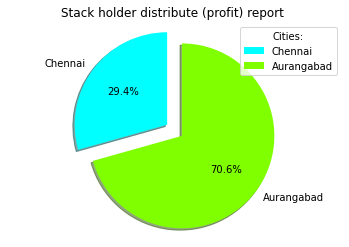

In [6]:
mylabels = ["Chennai","Aurangabad"]
mysizes = [Chennai, Aurangabad]
myexplode = [0.2,0]

fig1, ax1 =plt.subplots()
mycolors = ['#00FFFF', '#7FFF00']

ax1.pie(mysizes , explode = myexplode, labels = mylabels, autopct= '%1.1f%%', shadow=True, startangle=90, colors= mycolors)

ax1.axis('equal')

plt.title("Stack holder distribute (profit) report ")
plt.legend(title = "Cities:")
plt.show()
